In [2]:
import cv2
import matplotlib.pyplot as plt
### import matplotlib.pyplot as plt for using only plt keyword ,cv2 for open cv

In [3]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model ='frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)



In [5]:
classLabels =[]
file_name='labels.txt'
with open(file_name,'rt') as fpt:
     classLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000020EBCD0BA30>

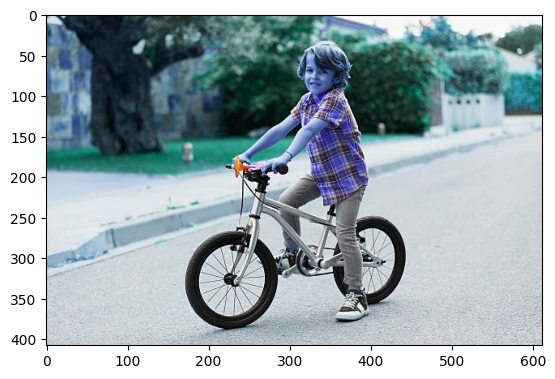

In [9]:
img = cv2.imread('boy.jpg')
plt.imshow(img)

In [10]:
ClassIndex, confidece , bbox =model.detect(img,confThreshold =0.5)

In [11]:
print(ClassIndex)

[1 2 1]


In [12]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd ,conf, boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img, classLabels[ClassInd-1],(boxes[0]+10, boxes[1]+40), font , fontScale=font_scale,color=(0,255,0), thickness=3)

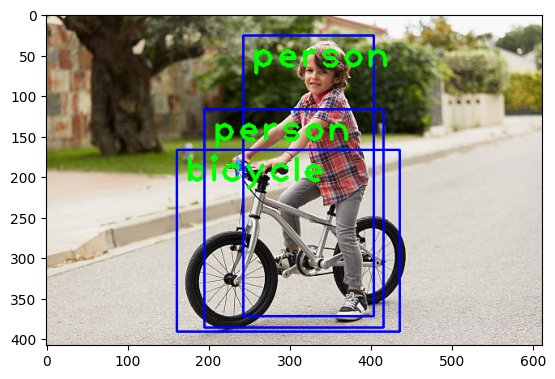

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## For Video


In [23]:
cap=cv2.VideoCapture('Traffic.mp4')
if not cap.isOpened():
     cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Can not open video')

font_scale=3
font = cv2.FONT_HERSHEY_PLAIN

while True:
 ret,frame=cap.read()
 ClassIndex,confidece,bbox=model.detect(frame, confThreshold=0.55)

 print(ClassIndex)

 if(len(ClassIndex)!=0):
  for ClassInd,conf, boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
          if(ClassInd<=80):
            cv2.rectangle(img,boxes,(255,0,0),2)
            cv2.putText(frame, classLabels[ClassInd-1],(boxes[0]+10, boxes[1]+40), font , fontScale=font_scale,color=(0,255,0), thickness=3)
 cv2.imshow('objdetection in video',frame)

 if cv2.waitKey(2) & 0xff == ord('q'):
       break
cap.release()
cv2.destroyaLLWindows()

[ 1  4  4  1  1  4  1  4  3  1 10  3  4  4  1  1]
[ 4  1  4  1  1  1  1 10  4  3  4  4  1]
[ 4  4  1  4  1  1  1  3  1  4 10  3  4]
[ 4  1  1  1  4  4 10  4  1  1  4  3  1  3]
[ 1  1  4  1  1  3  1 10  3  1  3  4  3]
[ 4  1  1  1  3  1  1  3 10  1  1  1]
[ 4  1  4  1  3  1  1  1  1  1  4 10  1  1  3]
[ 1  4  4  3  1  1  1  1  1  1 10  3  4]
[ 4  1  1  1  4  1  1  1  4  4 10  3  1]
[ 4  4  1  3  1  4  1  1  1  1 10  4  3  3]
[ 4  3  1  1  1  4  1  1  3  4 10  3  1  4]
[ 4  1  1  4  4  1  1  3  3  1  1  3  1 10]
[ 4  1  4  1  1  4  1  3  1  3  1  1 10]
[4 1 1 1 1 1 1 4 3 4 3 3]
[4 1 1 1 1 1 3 4 1 3 1 1]
[ 4  1  1  4  1  1  1  1  3  1  4  1 10]
[1 4 1 1 1 1 1 1 4 3 1 3]
[ 4  4  1  4  1  1  1  3  1  1  1  3 10]
[1 1 1 1 4 3 1 1 1 1]
[1 1 1 1 3 4 4 1 1]
[1 1 1 1 1 4]
[ 1  1  1  1  1  1  4 38 38  1]
[1 1 1 1 1]
[ 1  1  1  1  1 38]
[ 1  1  1  1  1 38  1]
[ 1  1  1  1  1 38  1 38 38  1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[ 1  1  1  1  1  1  1  1 10  1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 4 1]
[1

KeyboardInterrupt: 

# Webcam

In [71]:

cap=cv2.VideoCapture(1)
if not cap.isOpened():
     cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Can not open video')

font_scale =3
font = cv2.FONT_HERSHEY_PLAIN

while True:
 ret, frame =cap.read()
    
 ClassIndex, confidece, bbox =model.detect(frame, confThreshold=0.55)

 print(ClassIndex)

 if(len(ClassIndex)!=0):
  for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
          if(ClassInd<=80):
            cv2.rectangle(img, boxes,(255,0,0),2)
            cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font , fontScale=font_scale,color=(0,255,0), thickness=3)
 cv2.imshow('webcam',frame)

 if cv2.waitKey(2) & 0xFF == ord('q'):
       break
cap.release()
cv2.destroyaLLWindows()

[ 1 18]
()
[1]
[1]
[18]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
()
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[52  1]
[52  1]
[52  1]
[52  1]
[1]
[1]
[52  1]
[52  1]
[52  1]
[52  1]
[52  1]
[52  1]
[52  1]
[52  1]
[1]
[1]
[1]
[52  1]
[52  1]
[1]
[1]
[ 1 37]
[ 1 37]
[ 1 37]
[ 1 37]
[ 1 37]
[ 1 37]
[ 1 37]
[ 1 37]
[ 1 37]
[ 1 37]
[37  1]
[37  1]
[ 1 37]
[ 1 37]
[ 1 37]
[ 1 37]
[ 1 53 37]
[ 1 53 37]
[1]
[ 1 53 52]
[ 1 53 52]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 44]
[1]
[1]
[1]
[44  1 44]
[ 1 44]
[ 1 44]
[1]
[1]
[ 1 44]
[44  1]
[44  1]
[44  1]
[44  1]
[44  1 44]
[44  1 44]
[44 44  1]
[44  1]
[44  1]
[44  1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[

KeyboardInterrupt: 